# Levelling Activity

The objective of this activity is to train basic machine learning techniques that involves: 

- Pre Processing
- Pattern Extaction
- Model Evaluation

The data for this first practice is tabular and not Unstructured as the name of this subject suggests.


# Part 1: Selecting the Database

The chosen database is called [Binary Classification with a Bank Churn Dataset](https://www.kaggle.com/competitions/playground-series-s4e1/overview) and is a practice dataset developed by Kaggle itself.

# Part 2: Data Exploration

## Libraries

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot formatter
from  matplotlib.ticker import FuncFormatter


## Data Standardization: most common are 
# StandardScaler - mean 0 and var 1 
# MinMaxScaler - between 0 and 1
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Setting general style for the notebook

In [75]:
%matplotlib inline
sns.set_style('white')

## Importing data

In [3]:
data_file_path = '/Users/administrador/Documents/Pessoal/repositorios/unstructured_data_mining/data'

In [14]:
train = pd.read_csv(data_file_path + '/train.csv', index_col=0)

## Data Information:

 - No null values
 - 13 columns
 - 165.034 rows

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


Data Sample

In [16]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


Deleting CustomerId column

In [25]:
train = train.drop(['CustomerId'], axis=1).copy()

In [26]:
train.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,
0,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Categorical Variables

Surname

Text(0.5, 1.0, '10 most common surnames')

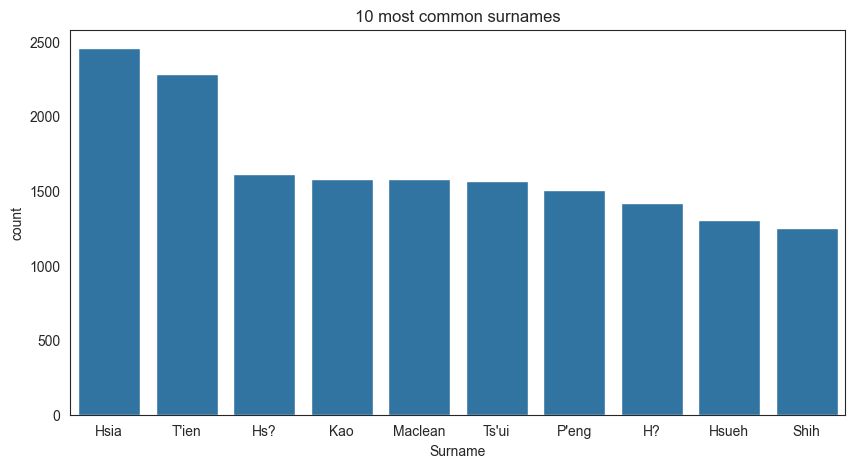

In [79]:
plt.subplots(figsize=(10,5))
sns.barplot(train['Surname'].value_counts()[:10])
plt.title('10 most common surnames')

In [80]:
train['Surname'].nunique()

2797

Geography

Text(0.5, 1.0, 'Country distribution')

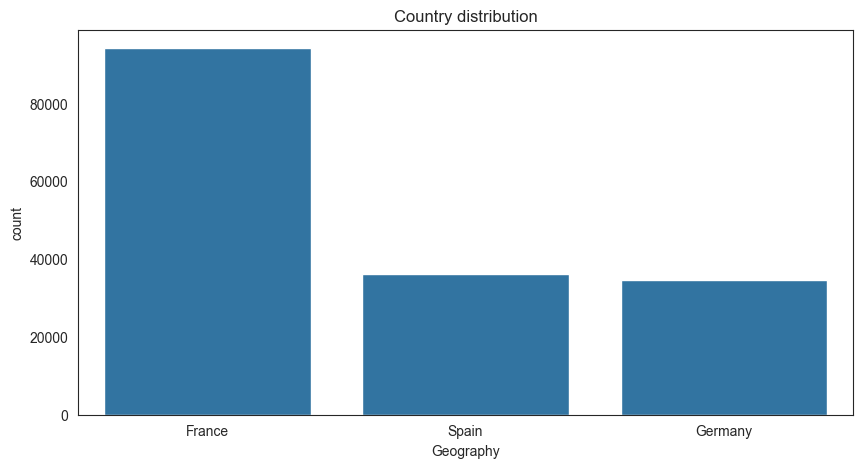

In [81]:
plt.subplots(figsize=(10,5))
sns.countplot(train, x='Geography')
plt.title('Country distribution')

Gender

Text(0.5, 1.0, 'Gender Distribution')

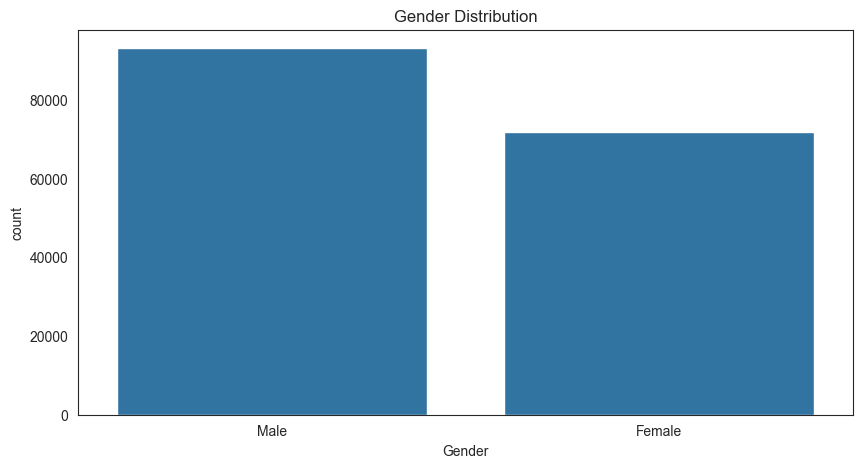

In [82]:
plt.subplots(figsize=(10,5))
sns.countplot(train, x='Gender')
plt.title('Gender Distribution')

### Numerical Variables

In [56]:
train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<Axes: title={'center': 'Credit Score distribution'}, xlabel='CreditScore', ylabel='Count'>

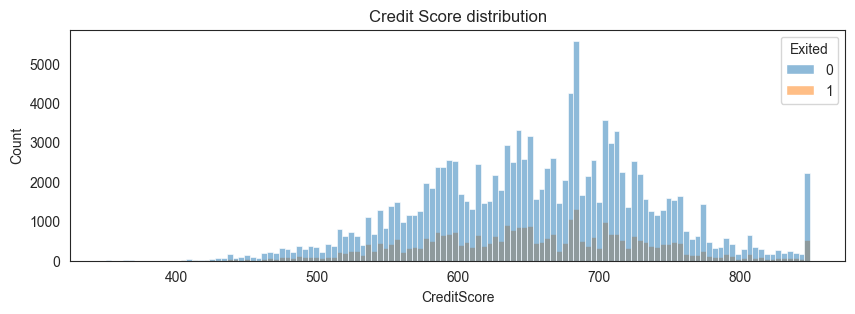

In [76]:
plt.subplots(figsize=(10,3))
plt.title('Credit Score distribution')
sns.histplot(train, x= 'CreditScore', hue='Exited', )

<Axes: title={'center': 'Age distribution'}, xlabel='Age', ylabel='Count'>

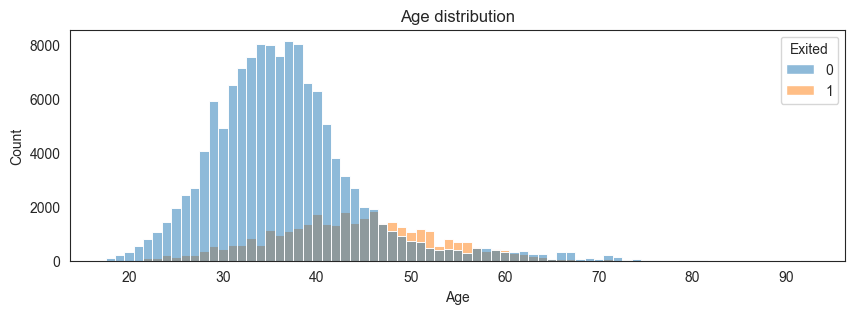

In [77]:
plt.subplots(figsize=(10,3))
plt.title('Age distribution')
sns.histplot(train, x= 'Age', hue='Exited', discrete=True)

<Axes: title={'center': 'Tenure distribution'}, xlabel='Tenure', ylabel='Count'>

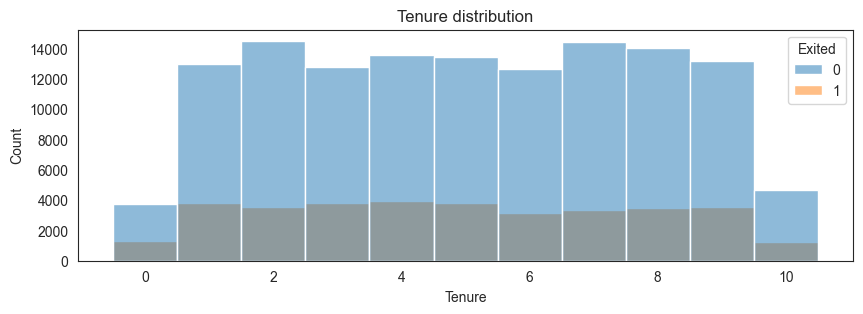

In [78]:
plt.subplots(figsize=(10,3))
plt.title('Tenure distribution')
sns.histplot(train, x= 'Tenure', hue='Exited', discrete=True)

<Axes: title={'center': 'Balance distribution'}, xlabel='Balance', ylabel='Count'>

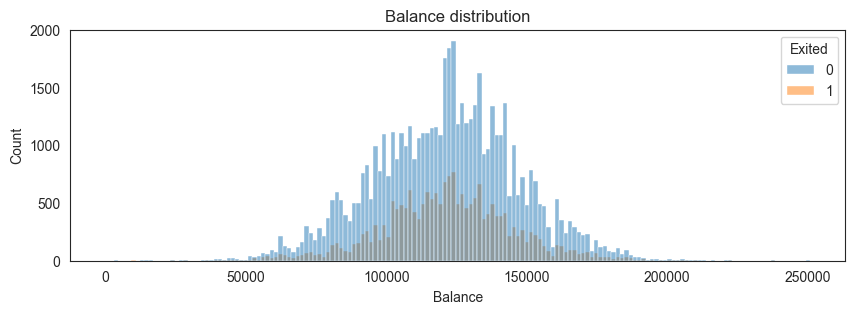

In [85]:
plt.subplots(figsize=(10,3))
plt.title('Balance distribution')
sns.histplot(train[train['Balance'] > 0], x= 'Balance', hue='Exited')

<Axes: title={'center': 'Balance distribution'}, xlabel='Balance', ylabel='count'>

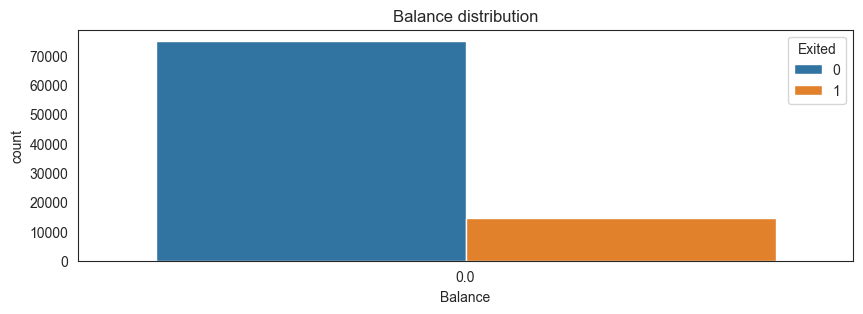

In [88]:
plt.subplots(figsize=(10,3))
plt.title('Balance distribution')
sns.countplot(train[train['Balance'] == 0], x= 'Balance', hue='Exited')

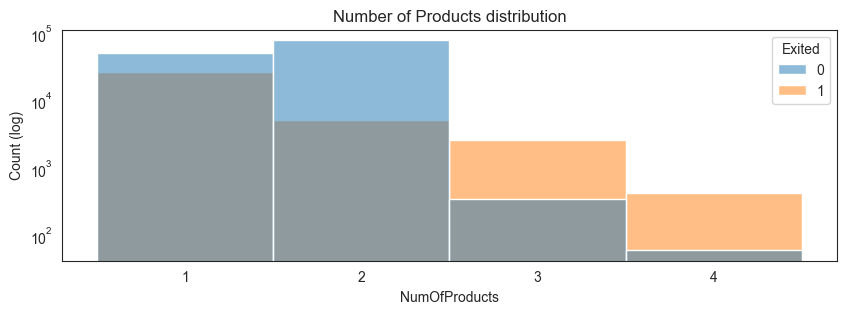

In [106]:
plt.subplots(figsize=(10,3))
plt.title('Number of Products distribution')
g = sns.histplot(train, x= 'NumOfProducts', hue='Exited', discrete=True)
g.set_xticks(range(1,5))
g.set_ylabel('Count (log)')
g.set_yscale('log')

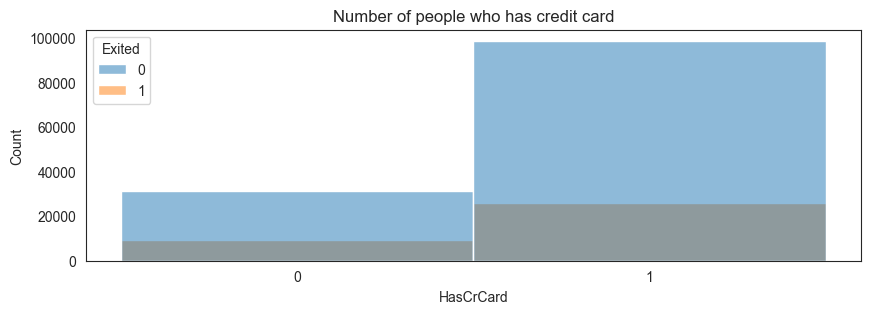

In [107]:
plt.subplots(figsize=(10,3))
plt.title('Number of people who has credit card')
g= sns.histplot(train, x= 'HasCrCard', hue='Exited', discrete=True)
g.set_xticks(range(2))

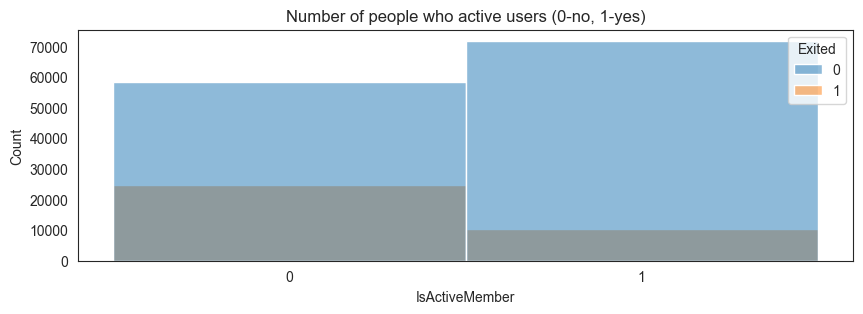

In [110]:
plt.subplots(figsize=(10,3))
plt.title('Number of people who active users (0-no, 1-yes)')
g= sns.histplot(train, x= 'IsActiveMember', hue='Exited', discrete=True)
g.set_xticks(range(2))

<Axes: title={'center': 'Estimated Salary distribution'}, xlabel='EstimatedSalary', ylabel='Count'>

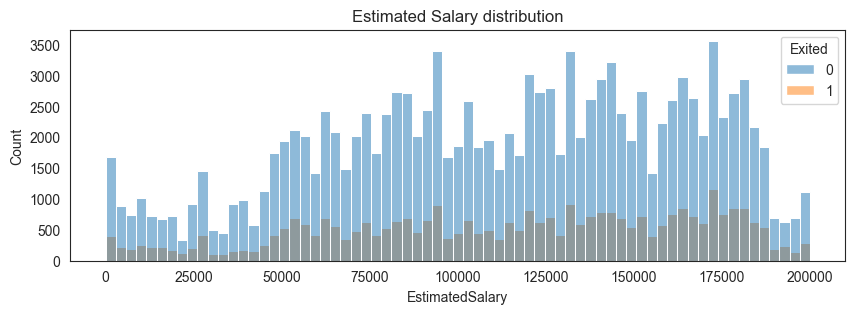

In [112]:
plt.subplots(figsize=(10,3))
plt.title('Estimated Salary distribution')
sns.histplot(train, x= 'EstimatedSalary', hue='Exited')

# Part 2: Pre Processing